# IMPORTS

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("valakhorasani/mobile-device-usage-and-user-behavior-dataset")
print("Path to dataset files:", path)

100%|██████████| 11.3k/11.3k [00:00<00:00, 5.28MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/versions/1


In [4]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # upload your kaggle.json

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d valakhorasani/mobile-device-usage-and-user-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset
License(s): apache-2.0
  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 23.1MB/s]


In [8]:
!unzip mobile-device-usage-and-user-behavior-dataset.zip

Archive:  mobile-device-usage-and-user-behavior-dataset.zip
  inflating: user_behavior_dataset.csv  


# TASK

Виконати наступне:

1) Завантажити дані, вивести назви колонок і розмір датасета

2) Опрацювати пропуски (по можливості заповнити їх або видалити)

3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

4) Нормалізувати дані

5) Провести навчання наступних класифікаторів:
* kNN
* дерево ухвалення рішень
* SVM
* Random Forest
* AdaBoost

Підібрати оптимальні параметри:
* для kNN
* для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

Серед обраних оптимальних моделей кожного класу вибрати найкращу.

Відобразити
sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

# DATA

In [2]:
df = pd.read_csv('/content/user_behavior_dataset.csv')

In [4]:
df.columns = df.columns.str.replace(r'[\/\-\\]', '_', regex=True)  # Replace /, -, \ with _
df.columns = df.columns.str.replace(r'[()]', '', regex=True)       # Delete ()
df.columns = df.columns.str.replace(r'\s+', '_', regex=True)       # Replace space with _

In [15]:
df

,User_ID,Device_Model,Operating_System,App_Usage_Time_min_day,Screen_On_Time_hours_day,Battery_Drain_mAh_day,Number_of_Apps_Installed,Data_Usage_MB_day,Age,Gender,User_Behavior_Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [9]:
print(df.columns.to_list())

['User_ID', 'Device_Model', 'Operating_System', 'App_Usage_Time_min_day', 'Screen_On_Time_hours_day', 'Battery_Drain_mAh_day', 'Number_of_Apps_Installed', 'Data_Usage_MB_day', 'Age', 'Gender', 'User_Behavior_Class']


Key Features:

* User ID: Unique identifier for each user.
* Device Model: Model of the user's smartphone.
* Operating System: The OS of the device (iOS or Android).
* App Usage Time: Daily time spent on mobile applications, measured in minutes.
* Screen On Time: Average hours per day the screen is active.
* Battery Drain: Daily battery consumption in mAh.
* Number of Apps Installed: Total apps available on the device.
* Data Usage: Daily mobile data consumption in megabytes.
* Age: Age of the user.
* Gender: Gender of the user (Male or Female).
* User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

In [6]:
df.shape

(700, 11)

In [43]:
df['User_ID'].nunique()

700

In [14]:
# Rows with at least one NULL value
df[df.isna().any(axis=1)]

,User_ID,Device_Model,Operating_System,App_Usage_Time_min_day,Screen_On_Time_hours_day,Battery_Drain_mAh_day,Number_of_Apps_Installed,Data_Usage_MB_day,Age,Gender,User_Behavior_Class


# Plots

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [17]:
numeric_cols

Index(['User_ID', 'App_Usage_Time_min_day', 'Screen_On_Time_hours_day',
       'Battery_Drain_mAh_day', 'Number_of_Apps_Installed',
       'Data_Usage_MB_day', 'Age', 'User_Behavior_Class'],
      dtype='object')

In [18]:
categorical_cols

Index(['Device_Model', 'Operating_System', 'Gender'], dtype='object')

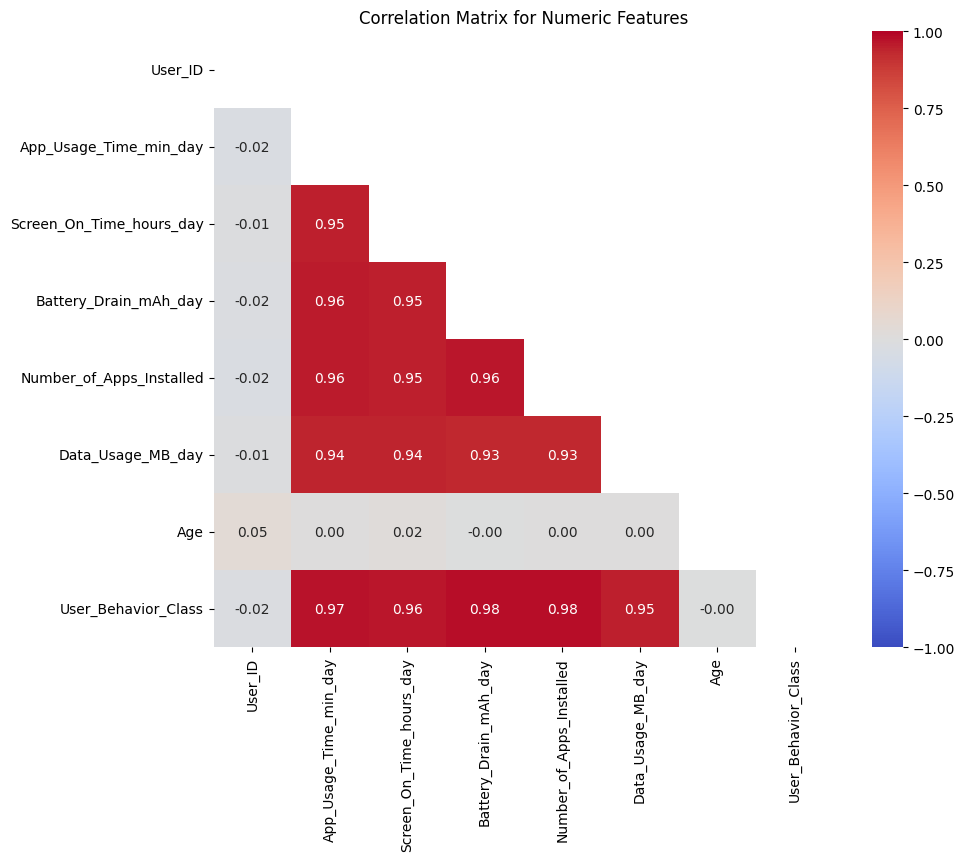

In [21]:
# Correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numeric Features")
plt.show()

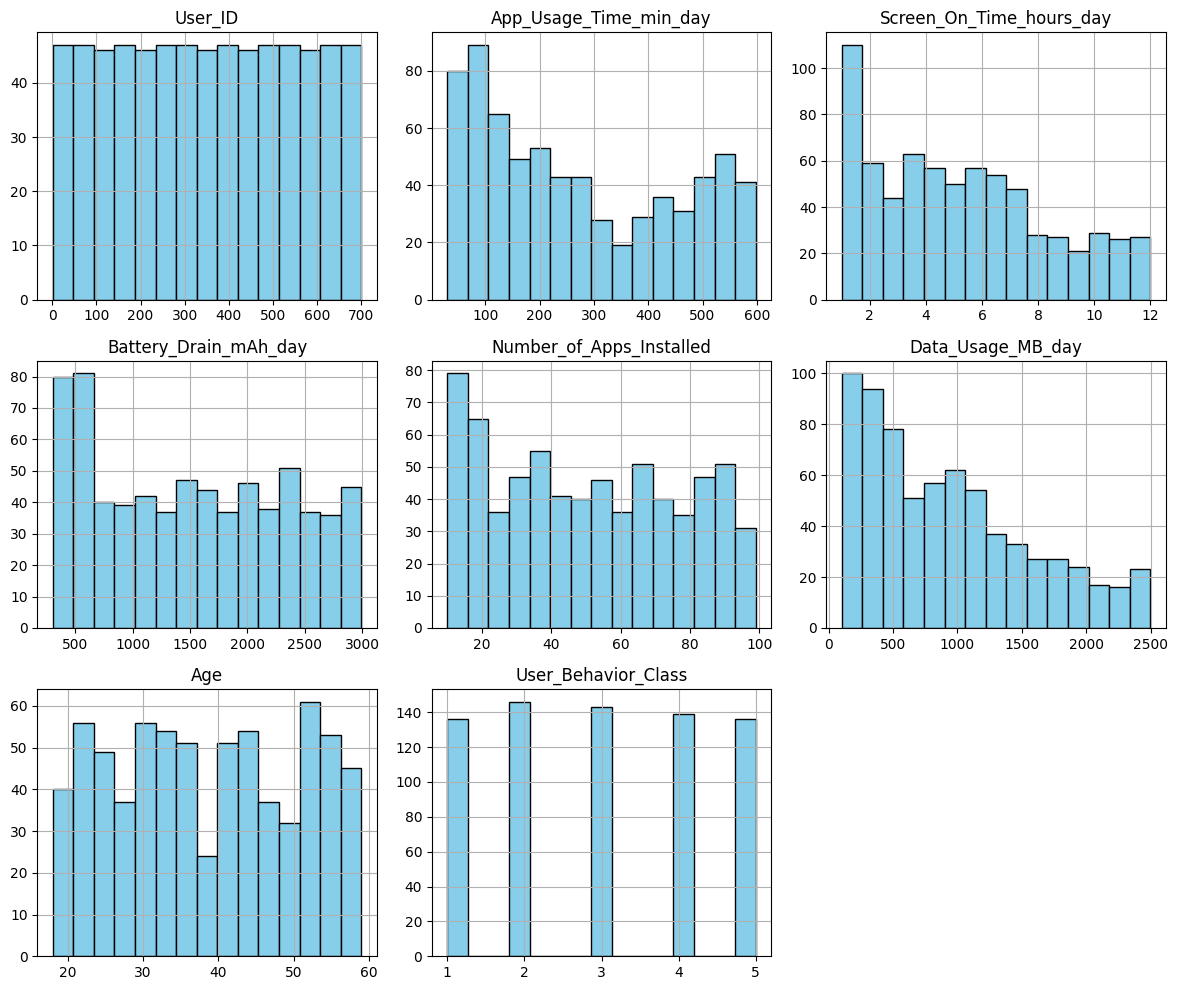

In [24]:
df[numeric_cols].hist(figsize=(12, 10), bins=15, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

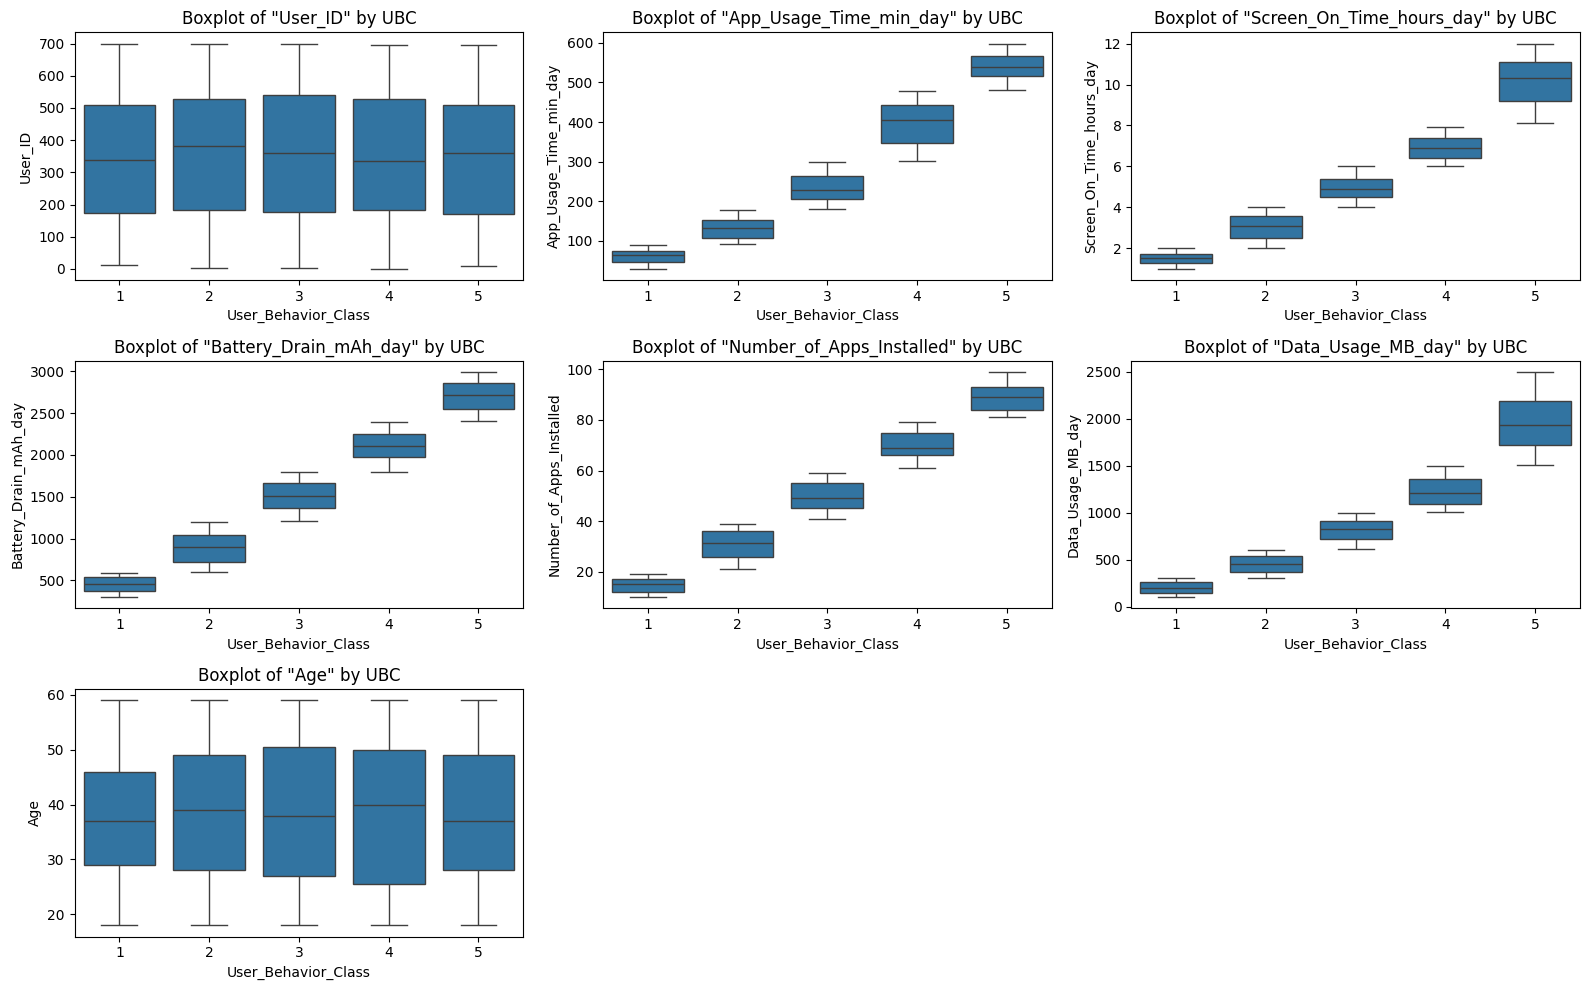

In [32]:
# Boxplots of numeric features relative to the target
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols.drop('User_Behavior_Class')):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='User_Behavior_Class', y=col, data=df)
    plt.title(f'Boxplot of "{col}" by UBC')

plt.tight_layout()
plt.show()

In [33]:
categorical_cols

Index(['Device_Model', 'Operating_System', 'Gender'], dtype='object')

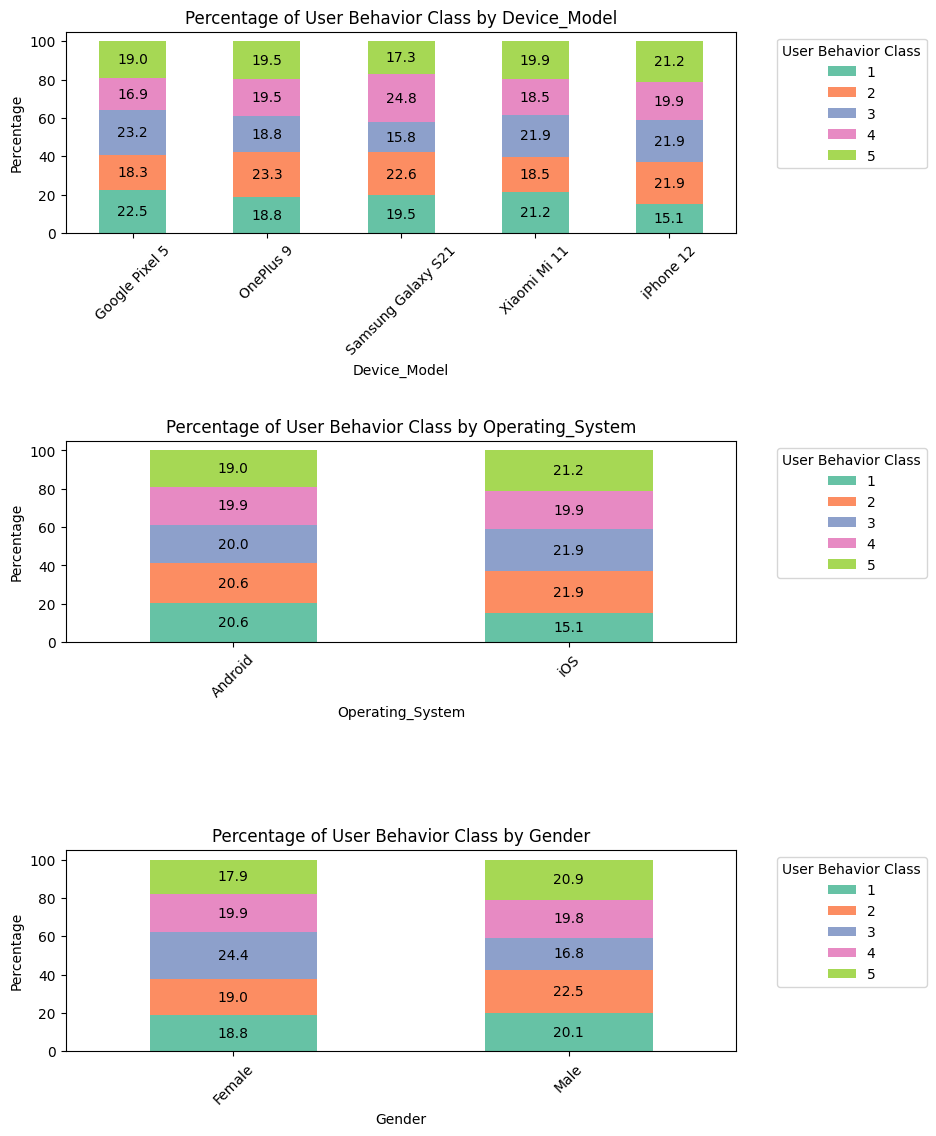

In [39]:
# Plot for each categorical column - percentage of User Behavior Class
plt.figure(figsize=(10, len(categorical_cols) * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)

    # Percentage of each target class within each category
    category_target_percent = pd.crosstab(df[col], df['User_Behavior_Class'], normalize='index') * 100
    category_target_percent.plot(kind='bar', stacked=True, ax=plt.gca(), color=sns.color_palette("Set2", 5))

    # labels
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f', label_type='center')

    plt.title(f'Percentage of User Behavior Class by {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='User Behavior Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(pad=3.0)

plt.show()



# Data Preprocessing

In [44]:
print(categorical_cols)
print(numeric_cols)

Index(['Device_Model', 'Operating_System', 'Gender'], dtype='object')
Index(['User_ID', 'App_Usage_Time_min_day', 'Screen_On_Time_hours_day',
       'Battery_Drain_mAh_day', 'Number_of_Apps_Installed',
       'Data_Usage_MB_day', 'Age', 'User_Behavior_Class'],
      dtype='object')


In [49]:
# Splitting data into features and target
X = df.drop(columns=['User_Behavior_Class'])
y = df['User_Behavior_Class']

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
transformed_data = pipeline.fit_transform(X)

# Names of the one-hot encoded columns
encoded_cat_columns = pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)

# Numeric and one-hot encoded columns
all_column_names = np.concatenate([numeric_features, encoded_cat_columns])

df_onehot_scaling = pd.DataFrame(transformed_data, columns=all_column_names)

In [50]:
df_onehot_scaling

,User_ID,App_Usage_Time_min_day,Screen_On_Time_hours_day,Battery_Drain_mAh_day,Number_of_Apps_Installed,Data_Usage_MB_day,Age,Device_Model_OnePlus 9,Device_Model_Samsung Galaxy S21,Device_Model_Xiaomi Mi 11,Device_Model_iPhone 12,Operating_System_iOS,Gender_Male
0,-1.729578,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.724629,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.719681,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.714732,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.709783,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.709783,-1.011609,-0.447664,-0.541394,-0.916705,-0.857419,-1.373076,0.0,0.0,0.0,1.0,1.0,1.0
696,1.714732,0.253407,0.498073,0.537341,0.643237,0.423843,1.709145,0.0,0.0,1.0,0.0,0.0,1.0
697,1.719681,-0.972078,-0.708557,-0.712428,-1.065271,-0.738668,0.959416,0.0,0.0,0.0,0.0,0.0,0.0
698,1.724629,-1.181031,-1.165120,-1.336702,-1.399544,-1.102733,0.459596,0.0,1.0,0.0,0.0,0.0,1.0


In [52]:
# Splitting into train/test sets
X_train_norm, X_test_norm, y_train, y_test = train_test_split(df_onehot_scaling, y, test_size=0.2, random_state=123)

# Shapes of the splits
X_train_norm.shape, X_test_norm.shape, y_train.shape, y_test.shape

((560, 13), (140, 13), (560,), (140,))

# Models

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
# kNN - GridSearch for n_neighbors
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': range(1, 31)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train_norm, y_train)
best_knn = knn_grid.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=26)

In [59]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_norm, y_train)

DecisionTreeClassifier(random_state=1)

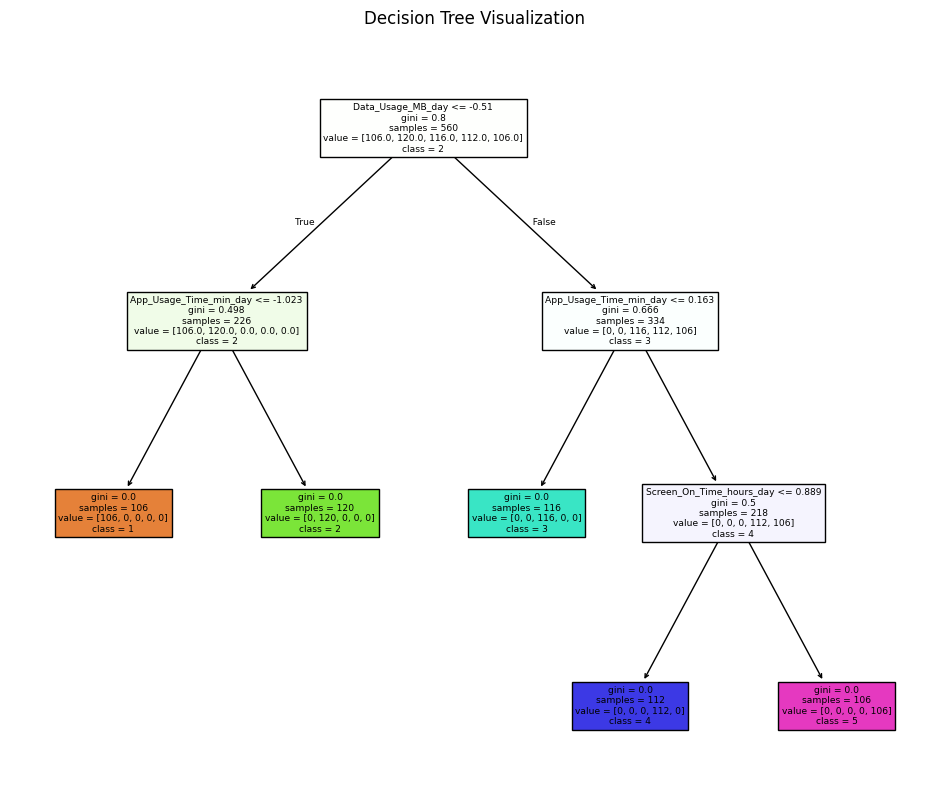

In [68]:
plt.figure(figsize=(12, 10))
plot_tree(dt, filled=True, feature_names=df_onehot_scaling.columns, class_names=[str(i) for i in np.unique(y)])
plt.title("Decision Tree Visualization")
plt.show()

In [63]:
# SVM - GridSearch for C and gamma
svm = SVC()
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train_norm, y_train)
best_svm = svm_grid.best_estimator_
best_svm

SVC(C=1, gamma=0.1)

In [61]:
# Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_norm, y_train)

RandomForestClassifier(random_state=1)

In [57]:
# AdaBoost
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=1)

In [62]:
# Evaluating each model and printing metrics
models = {'kNN': best_knn, 'Decision Tree': dt, 'SVM': best_svm, 'Random Forest': rf, 'AdaBoost': ada}

for name, model in models.items():
    print(f"Model: {name}")

    # Predict on the test set
    y_pred = model.predict(X_test_norm)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*60 + "\n")

Model: kNN
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        30

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix:
[[30  0  0  0  0]
 [ 0 26  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 30]]

------------------------------------------------------------

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusion:

Winners: kNN, Decision Tree, SVM, and Random Forest.

All four models show equally high performance with 100% accuracy. The choice between them may depend on additional factors, such as computational complexity, training time, or the size of the dataset, but based on the presented metrics, they are equivalent.

\


Loser: AdaBoost.
The AdaBoost model performed significantly worse compared to the other models, especially in predicting classes 3 and 4.